In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.simplefilter(action='ignore', category= FutureWarning)

In [59]:
df_train=pd.read_csv('movie_train_data.txt',sep=':::',names=['ID','TITLE','GENRE','DESCRIPTION'])
df_test=pd.read_csv('movie_test_data.txt',sep=':::',names=['ID','TITLE','DESCRIPTION'])
df_test_sol=pd.read_csv('movie_test_solution.txt',sep=':::',names=['ID','TITLE','GENRE','DESCRIPTION'])

C:\Users\Aditya\AppData\Local\Temp\ipykernel_28996\1931186325.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_train=pd.read_csv('movie_train_data.txt',sep=':::',names=['ID','TITLE','GENRE','DESCRIPTION'])
C:\Users\Aditya\AppData\Local\Temp\ipykernel_28996\1931186325.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_test=pd.read_csv('movie_test_data.txt',sep=':::',names=['ID','TITLE','DESCRIPTION'])
C:\Users\Aditya\AppData\Local\Temp\ipykernel_28996\1931186325.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char

In [60]:
df_train.head()

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [63]:
df_test.head()

,ID,TITLE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [65]:
df_test_sol.head()

,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [67]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  int64 
 1   TITLE        54214 non-null  object
 2   GENRE        54214 non-null  object
 3   DESCRIPTION  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [69]:
df_test_sol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54200 non-null  int64 
 1   TITLE        54200 non-null  object
 2   GENRE        54200 non-null  object
 3   DESCRIPTION  54200 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


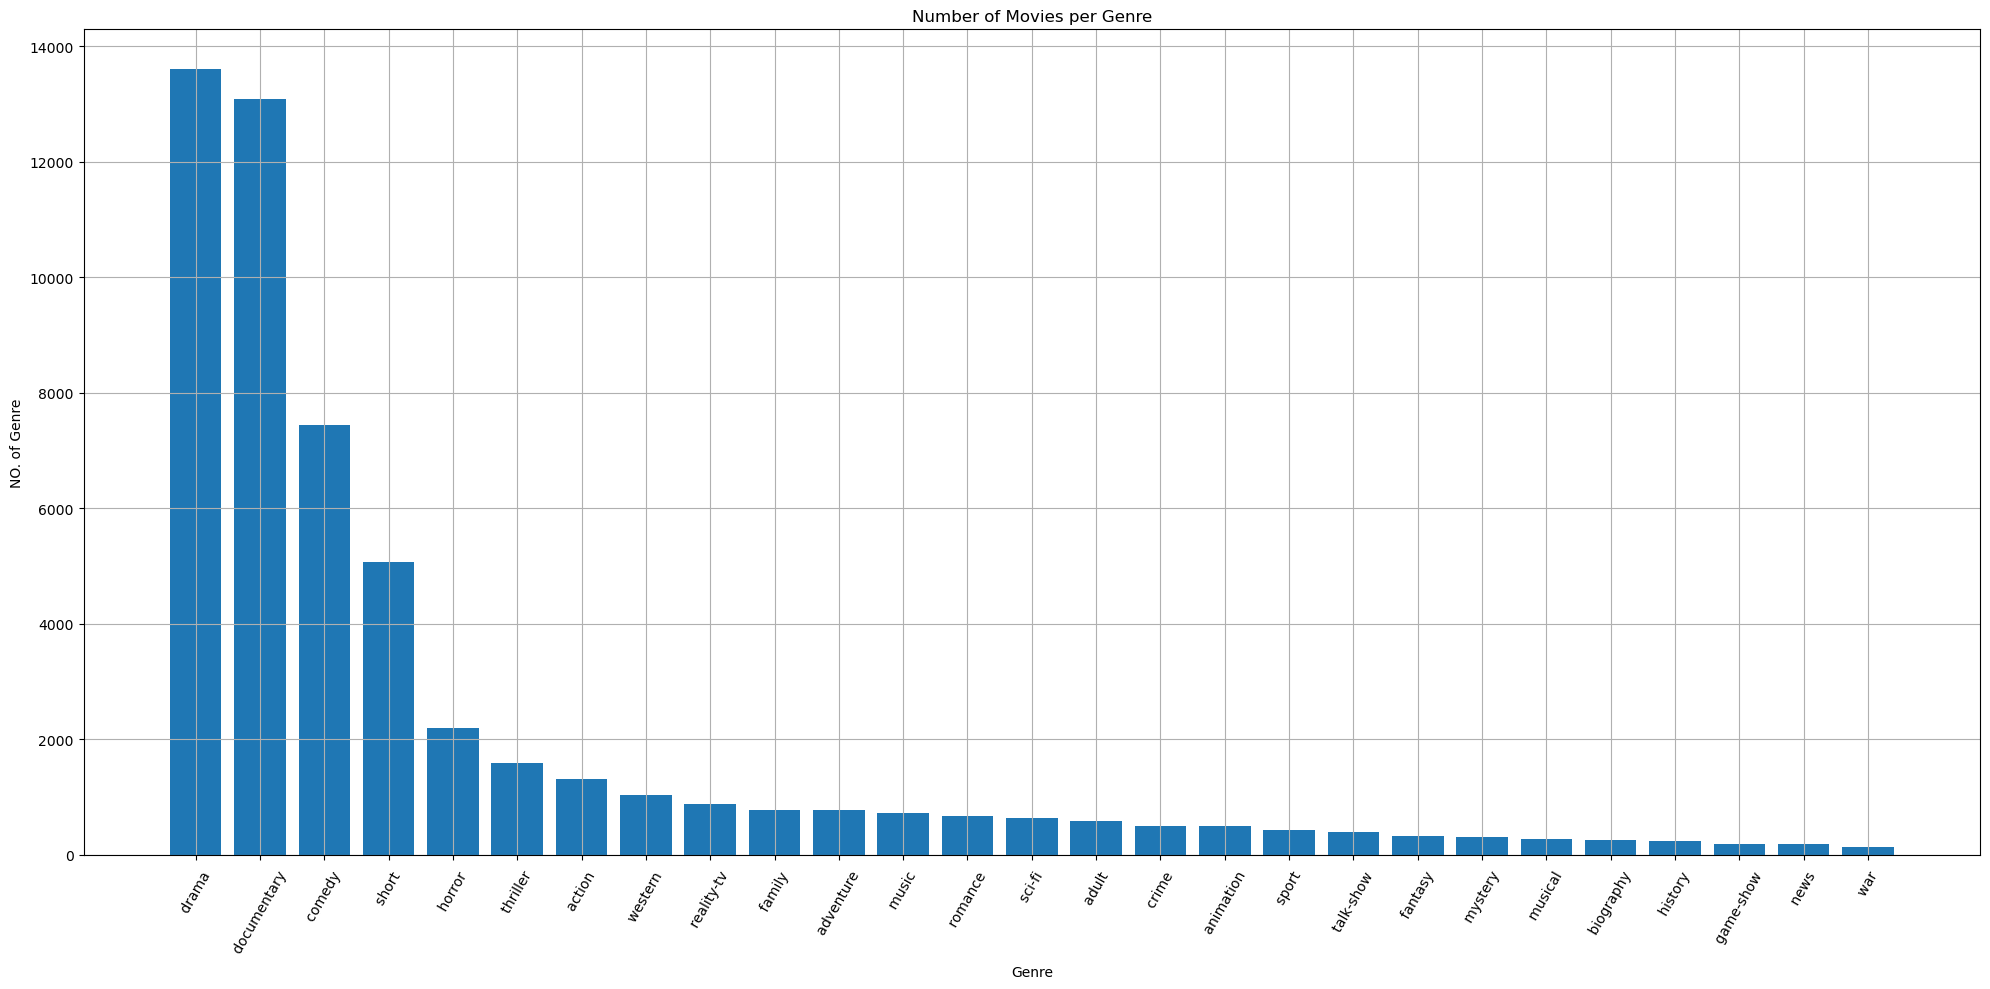

The most watched genre is:  drama 


In [71]:
import matplotlib.pyplot as plt
genre_counts=df_train['GENRE'].value_counts()
plt.figure(figsize=(20,10))
plt.bar(genre_counts.index,genre_counts.values)
plt.title('Number of Movies per Genre')
plt.xlabel('Genre')
plt.ylabel('NO. of Genre')
plt.xticks(rotation=60)
plt.tight_layout()
plt.grid()
plt.show()
most_watched_genre=genre_counts.idxmax()
print("The most watched genre is:",most_watched_genre)

In [73]:
df_train=df_train.drop(columns=['ID'],axis=1)
df_test=df_test.drop(columns=['ID'],axis=1)

In [75]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df_train['GENRE']=label_encoder.fit_transform(df_train['GENRE'])
df_test_sol['GENRE']=label_encoder.fit_transform(df_test_sol['GENRE'])

In [77]:
df_train['combined_text']=df_train['TITLE']+' '+df_train['DESCRIPTION']
df_test['combined_text']=df_test['TITLE']+' '+df_test['DESCRIPTION']

In [79]:
X_train=df_train.drop(['GENRE','DESCRIPTION','TITLE'],axis=1)
X_test=df_test.drop(['DESCRIPTION','TITLE'],axis=1)

In [81]:
y_train=df_train['GENRE']
y_test=df_test_sol['GENRE']

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english')
tfidf_vectorizer.fit(X_train['combined_text'])
X_train=tfidf_vectorizer.transform(X_train['combined_text'])
X_test=tfidf_vectorizer.transform(X_test['combined_text'])

In [87]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1)

In [90]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression 

In [98]:
model=LogisticRegression(C=1)
model.fit(x_train,y_train)

C:\Users\Aditya\anaconda0.2\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1)

In [102]:
y_train_pred1=model.predict(x_train)
print(classification_report(y_train,y_train_pred1))

              precision    recall  f1-score   support

           0       0.78      0.43      0.56      1188
           1       0.91      0.39      0.55       526
           2       0.87      0.25      0.39       701
           3       0.95      0.12      0.21       439
           4       0.00      0.00      0.00       231
           5       0.73      0.80      0.76      6725
           6       0.73      0.08      0.14       456
           7       0.73      0.95      0.82     11783
           8       0.65      0.91      0.76     12256
           9       0.83      0.17      0.28       711
          10       1.00      0.03      0.05       283
          11       0.96      0.54      0.69       179
          12       0.00      0.00      0.00       220
          13       0.83      0.75      0.78      1965
          14       0.86      0.53      0.65       667
          15       0.90      0.04      0.07       244
          16       1.00      0.01      0.02       291
          17       0.91    

C:\Users\Aditya\anaconda0.2\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Aditya\anaconda0.2\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Aditya\anaconda0.2\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [104]:
y_val_pred1=model.predict(x_val)
print(classification_report(y_val,y_val_pred1))

              precision    recall  f1-score   support

           0       0.54      0.24      0.33       127
           1       0.79      0.17      0.28        64
           2       0.59      0.14      0.22        74
           3       1.00      0.03      0.07        59
           4       0.00      0.00      0.00        34
           5       0.53      0.57      0.54       722
           6       0.00      0.00      0.00        49
           7       0.65      0.88      0.75      1313
           8       0.52      0.79      0.63      1357
           9       0.67      0.03      0.05        73
          10       0.00      0.00      0.00        40
          11       0.90      0.60      0.72        15
          12       0.00      0.00      0.00        23
          13       0.73      0.60      0.66       239
          14       0.72      0.53      0.61        64
          15       0.00      0.00      0.00        33
          16       0.00      0.00      0.00        28
          17       0.00    

C:\Users\Aditya\anaconda0.2\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Aditya\anaconda0.2\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Aditya\anaconda0.2\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [106]:
y_test_pred1=model.predict(X_test)
print(classification_report(y_test,y_test_pred1))

              precision    recall  f1-score   support

           0       0.53      0.27      0.36      1314
           1       0.65      0.18      0.28       590
           2       0.72      0.17      0.28       775
           3       0.73      0.02      0.03       498
           4       0.00      0.00      0.00       264
           5       0.56      0.58      0.57      7446
           6       0.39      0.03      0.05       505
           7       0.65      0.88      0.75     13096
           8       0.53      0.80      0.64     13612
           9       0.54      0.08      0.14       783
          10       1.00      0.00      0.01       322
          11       0.89      0.50      0.64       193
          12       0.00      0.00      0.00       243
          13       0.68      0.56      0.61      2204
          14       0.70      0.40      0.51       731
          15       0.50      0.00      0.01       276
          16       1.00      0.00      0.01       318
          17       0.73    

C:\Users\Aditya\anaconda0.2\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Aditya\anaconda0.2\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Aditya\anaconda0.2\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [118]:
from sklearn.svm import LinearSVC
svc=LinearSVC(penalty='l2',C=0.1,dual=False)
svc.fit(x_train,y_train)

LinearSVC(C=0.1, dual=False)

In [122]:
y_train_pred2=svc.predict(x_train)
print(classification_report(y_train,y_train_pred2))

              precision    recall  f1-score   support

           0       0.89      0.51      0.65      1188
           1       0.97      0.58      0.72       526
           2       0.95      0.38      0.55       701
           3       0.99      0.37      0.54       439
           4       1.00      0.01      0.02       231
           5       0.76      0.78      0.77      6725
           6       1.00      0.15      0.26       456
           7       0.74      0.95      0.83     11783
           8       0.66      0.91      0.77     12256
           9       0.95      0.26      0.41       711
          10       0.95      0.22      0.36       283
          11       0.94      0.80      0.86       179
          12       0.00      0.00      0.00       220
          13       0.81      0.83      0.82      1965
          14       0.91      0.64      0.75       667
          15       0.97      0.14      0.24       244
          16       1.00      0.17      0.29       291
          17       0.94    

C:\Users\Aditya\anaconda0.2\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Aditya\anaconda0.2\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Aditya\anaconda0.2\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [124]:
y_val_pred2=svc.predict(x_val)
print(classification_report(y_val,y_val_pred2))

              precision    recall  f1-score   support

           0       0.57      0.20      0.30       127
           1       0.80      0.25      0.38        64
           2       0.69      0.15      0.24        74
           3       0.80      0.07      0.12        59
           4       0.00      0.00      0.00        34
           5       0.53      0.56      0.55       722
           6       0.00      0.00      0.00        49
           7       0.65      0.89      0.75      1313
           8       0.53      0.80      0.64      1357
           9       0.33      0.04      0.07        73
          10       1.00      0.03      0.05        40
          11       0.73      0.73      0.73        15
          12       0.00      0.00      0.00        23
          13       0.65      0.64      0.64       239
          14       0.69      0.56      0.62        64
          15       0.00      0.00      0.00        33
          16       0.00      0.00      0.00        28
          17       0.00    

C:\Users\Aditya\anaconda0.2\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Aditya\anaconda0.2\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Aditya\anaconda0.2\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [128]:
y_test_pred2=svc.predict(X_test)
print(classification_report(y_test,y_test_pred2))

              precision    recall  f1-score   support

           0       0.55      0.24      0.33      1314
           1       0.67      0.22      0.33       590
           2       0.72      0.19      0.30       775
           3       0.68      0.04      0.07       498
           4       0.00      0.00      0.00       264
           5       0.56      0.55      0.56      7446
           6       0.64      0.01      0.03       505
           7       0.64      0.89      0.74     13096
           8       0.53      0.80      0.64     13612
           9       0.59      0.08      0.13       783
          10       0.46      0.02      0.04       322
          11       0.80      0.59      0.68       193
          12       0.00      0.00      0.00       243
          13       0.64      0.62      0.63      2204
          14       0.69      0.41      0.51       731
          15       0.50      0.00      0.01       276
          16       0.00      0.00      0.00       318
          17       0.75    

C:\Users\Aditya\anaconda0.2\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Aditya\anaconda0.2\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Aditya\anaconda0.2\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [138]:
def predict_genre(title, description, model, vectorizer, label_encoder):
    data = pd.DataFrame({'TITLE': [title], 'DESCRIPTION': [description]})
    data['combined_text'] = data['TITLE'] + ' ' + data['DESCRIPTION'] 
    X_new = vectorizer.transform(data['combined_text'])
    y_pred = model.predict(X_new)
    predicted_genre = label_encoder.inverse_transform(y_pred)[0]
    return predicted_genre


In [144]:
predict_genre("Young, Wild and Wonderful (1980)","As the bus empties the students for their field trip to the Museum of Natural History,little does the tour guide suspect that the students are there for morethan just another tour. First, during the lecture films, the coeds driftinto dreams of the most erotic fantasies one can imagine. After the films, they release the emotion of the fantasies in the most erotic and uncommon ways. One slips off to the curator's office for a little acquisition.Another finds the anthropologist to see what bones can be identified. Even the head teacher isn't immune. Soon the tour is over, but as the bus departs,everyone admits it was quite an education.",svc,tfidf_vectorizer,label_encoder)

' adult '